# TASKS 2020

#### Damien Connolly
#### G00340321

## Task 1 - Counts

Write a Python function that takes a list as input and returns a 
dictionary of unique items in the list as keys and the number of 
times each item appears as values.


I decided to iterate over the list and use each distinct element of the list as a key of the dictionary and store the corresponding count of that key as values. 


Ref:
[1]. https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

[2]. https://docs.python.org/3/tutorial/controlflow.html

In [101]:
list = ['A', 'A', 'B', 'A', 'C']

def counts():

    dict = {}
    for item in list:
        dict[item] = list.count(item)
    return dict
        
    
    for key, value in dict.items(): 
        print (dict)
    
counts()

{'A': 3, 'B': 1, 'C': 1}

In [4]:
list = ['C', 'C', 'B', 'A', 'D']

def counts():

    dict = {}
    for item in list:
        dict[item] = list.count(item)
    return dict
        
    
    for key, value in dict.items(): 
        print (dict)
    
counts()

{'C': 2, 'B': 1, 'A': 1, 'D': 1}

In [103]:
list = ['G', 'R', 'B', 'R', 'R', 'T', 'W', 'W']

def counts():

    dict = {}
    for item in list:
        dict[item] = list.count(item)
    return dict
        
    
    for key, value in dict.items(): 
        print (dict)
    
counts()

{'G': 1, 'R': 3, 'B': 1, 'T': 1, 'W': 2}

<br/>

## Task 2

Write a Python function called dicerolls that simulates
rolling dice. Your function should take two parameters: the number of dice k and
the number of times to roll the dice n. The function should simulate randomly
rolling k dice n times, keeping track of each total face value. It should then return
a dictionary with the number of times each possible total face value occurred. So,
calling the function as diceroll(k=2, n=1000) should return a dictionary like:
{2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}






Ref:
https://www.codegrepper.com/code-examples/python/dice+rolling+function+python
https://careerkarma.com/blog/python-dictionary-get/
https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key

In [165]:
import numpy as np

def dicerolls(k,n):
    
    # Set variables
    roll = n
    noroll = 0
    dicevalue = k * 6
    
    # Use list to store dice
    dice = []
    for i in range(k):
        dice.append(i+1)
    
    # Dictionary to store result
    dict = {}
   
    while dicevalue > 0:
        dict[dicevalue] = 0
        dicevalue -= 1
        
    # Roll the dice    
    while roll > 0:
        diceroll = np.random.randint(1,7)
        for i in dice:
            result = (diceroll + noroll)
            dicevalue = dict.get(diceroll)
            dict[result] = dicevalue + 1
            noroll += 6
        roll -= 1
        noroll = 0
        
    print(dict)
        
dicerolls(2,1000)

{12: 169, 11: 169, 10: 182, 9: 171, 8: 156, 7: 159, 6: 168, 5: 168, 4: 181, 3: 170, 2: 155, 1: 158}


In [161]:
import numpy as np

def dicerolls(k,n):

    dice = [2, 3, 4, 5, 6]

    for i in range(k):
        diceroll = [np.random.choice(dice, k) for i in range(n)]
        result = (diceroll)
        return result
    print(result)

dicerolls(2,4)

[array([4, 4]), array([4, 4]), array([4, 5]), array([6, 4])]

<br/>
<br/>

## Task 3 - numpy.random.binomial


The numpy.random.binomial function can be used to
simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a
coin is flipped many times then the number of heads is well approximated by a
bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of
getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively
low, and the chances of getting any other number of heads decreases as you move
away from 50 in either direction towards 0 or 100. Write some python code that
simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track
of the number of heads in each of the 1,000 simulations. Select an appropriate
plot to depict the resulting list of 1,000 numbers, showing that it roughly follows
a bell-shaped curve. You should explain your work in a Markdown cell above the
code.

Explanation + References

https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b

C:\Users\damie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

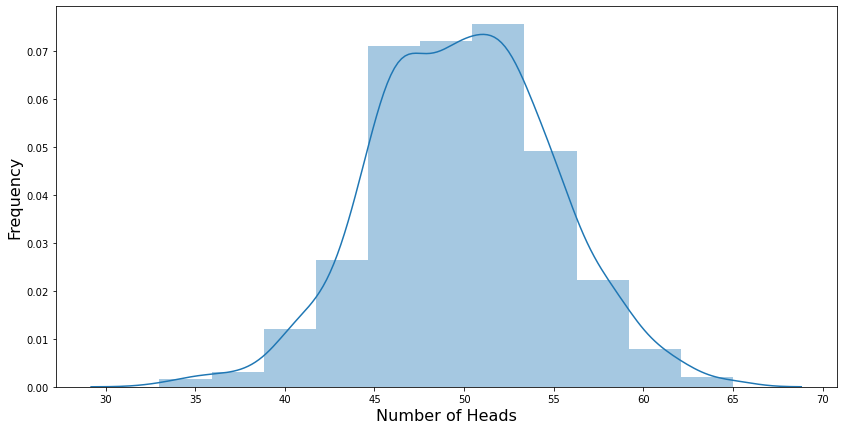

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# number of simulations
trials = 1000

# number of flips
n = 100

# Probability of success
p = 0.5

# Function that runs our coin toss trials
# Heads is a list of the number of successes from each trial
def binom(trials, n, p):
    heads = []
    for i in range(trials):
        tosses = [np.random.random() for i in range(n)]
        heads.append(len([i for i in tosses if i>=0.50]))
    return heads

binom(trials, n, p)

# Plot the results 
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(heads, bins=11, label='simulation results')
ax.set_xlabel("Number of Heads",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
